In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np 
import joblib
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv('../Testing Dataset/CICIDS2017/Train_standard.csv',sep=',')
df_test = pd.read_csv('../Testing Dataset/CICIDS2017/Test_standardtest1_CICIDS2017OneCls.csv',sep=',')

In [3]:
df_train.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Classification
0,0.848357,7.250000e-07,0.000000,0.000003,0.000004,9.360354e-09,0.000257,0.002906,0.001293,0.000000,...,0.999999,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.123304,9.946852e-01,0.000155,0.000106,0.000094,3.580335e-06,0.005908,0.000000,0.000948,0.004024,...,0.999999,0.007201,0.020616,0.0431,0.000562,0.084167,0.072932,0.204167,0.044176,1
2,0.000809,5.039167e-04,0.000000,0.000003,0.000028,1.528858e-07,0.001969,0.022276,0.009912,0.000000,...,0.999999,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.865098,2.500000e-08,0.000005,0.000000,0.000019,0.000000e+00,0.001327,0.000000,0.003340,0.003782,...,0.999999,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.959285,4.750000e-07,0.000000,0.000003,0.000004,9.360354e-09,0.000257,0.002906,0.001293,0.000000,...,0.999999,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [4]:
df_train_x = df_train[df_train.columns[:78]]
df_train_y = df_train['Classification']
df_train_x.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.848357,7.250000e-07,0.000000,0.000003,0.000004,9.360354e-09,0.000257,0.002906,0.001293,0.000000,...,0.00000,0.999999,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.123304,9.946852e-01,0.000155,0.000106,0.000094,3.580335e-06,0.005908,0.000000,0.000948,0.004024,...,0.00001,0.999999,0.007201,0.020616,0.0431,0.000562,0.084167,0.072932,0.204167,0.044176
2,0.000809,5.039167e-04,0.000000,0.000003,0.000028,1.528858e-07,0.001969,0.022276,0.009912,0.000000,...,0.00000,0.999999,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.865098,2.500000e-08,0.000005,0.000000,0.000019,0.000000e+00,0.001327,0.000000,0.003340,0.003782,...,0.00000,0.999999,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.959285,4.750000e-07,0.000000,0.000003,0.000004,9.360354e-09,0.000257,0.002906,0.001293,0.000000,...,0.00000,0.999999,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(df_train_x,df_train_y,test_size=0.30,random_state=9)

x_train_awal = x_train
x_test_awal = x_test
y_train_awal = y_train
y_test_awal = y_test


x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape


(70000, 78, 1)

In [6]:
model_full = Sequential()
model_full.add(LSTM(100, input_shape=(x_train.shape[1],1), return_sequences=True))
model_full.add(Dropout(0.5))
model_full.add(LSTM(32, return_sequences=False))
model_full.add(Dense(10, activation='relu'))
model_full.add(Dense(2, activation='softmax'))

model_full.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=['accuracy','MeanSquaredError', 'MeanAbsoluteError'])
model_full.fit(x_train, y_train, epochs=20)


Epoch 1/20
2188/2188 [==============================] - 320s 144ms/step - loss: 0.3731 - accuracy: 0.8352 - mean_squared_error: 0.3768 - mean_absolute_error: 0.5000
Epoch 2/20
2188/2188 [==============================] - 311s 142ms/step - loss: 0.2646 - accuracy: 0.8763 - mean_squared_error: 0.4154 - mean_absolute_error: 0.5000
Epoch 3/20
2188/2188 [==============================] - 295s 135ms/step - loss: 0.2080 - accuracy: 0.8984 - mean_squared_error: 0.4348 - mean_absolute_error: 0.5000
Epoch 4/20
2188/2188 [==============================] - 294s 134ms/step - loss: 0.1737 - accuracy: 0.9213 - mean_squared_error: 0.4460 - mean_absolute_error: 0.5000s - loss: 0.1738 - accuracy: 0.9213 - mean_squared_er
Epoch 5/20
2188/2188 [==============================] - 319s 146ms/step - loss: 0.1424 - accuracy: 0.9382 - mean_squared_error: 0.4560 - mean_absolute_error: 0.5000
Epoch 6/20
2188/2188 [==============================] - 281s 129ms/step - loss: 0.1264 - accuracy: 0.9456 - mean_squared_e

In [7]:
model_full.save('CICIDS_Model.h5')

In [8]:
y_pred_train = model_full.predict(x_train)
y_pred_train

array([[1.7054868e-04, 9.9982941e-01],
       [1.4324307e-02, 9.8567569e-01],
       [8.8685614e-05, 9.9991131e-01],
       ...,
       [9.6729716e-05, 9.9990320e-01],
       [9.1259164e-05, 9.9990869e-01],
       [3.6191997e-01, 6.3808000e-01]], dtype=float32)

In [9]:
y_pred_train_1 = [x[0] for x in y_pred_train]
y_pred_train_2 = [x[1] for x in y_pred_train]

In [10]:
df_train_akhir = x_train_awal
df_train_akhir['lstm_result_1'] = y_pred_train_1
df_train_akhir['lstm_result_2'] = y_pred_train_2
df_train_akhir['label'] = y_train
df_train_akhir

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,lstm_result_1,lstm_result_2,label
39521,0.001221,5.919333e-04,0.000009,0.000017,0.000262,3.536654e-06,0.018450,0.000000,0.030956,0.042929,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000171,0.999829,1
26100,0.001221,4.521163e-02,0.000009,0.000003,0.000007,0.000000e+00,0.000257,0.000000,0.000862,0.000598,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.014324,0.985676,1
36635,0.000809,8.833333e-07,0.000005,0.000007,0.000036,4.118556e-07,0.001284,0.014528,0.006464,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000089,0.999911,1
36465,0.000809,4.881083e-04,0.000000,0.000003,0.000024,1.466455e-07,0.001670,0.018886,0.008403,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000101,0.999899,1
89838,0.001221,8.318574e-01,0.000041,0.000021,0.000402,1.808888e-05,0.014170,0.000000,0.014264,0.024077,...,0.0,0.00001,0.00001,0.828333,0.0,0.828333,0.828333,0.999951,0.000049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22584,0.000809,1.947833e-04,0.000000,0.000003,0.000029,1.232447e-07,0.002012,0.022760,0.010127,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000109,0.999891,1
65462,0.000809,2.116667e-06,0.000005,0.000007,0.000046,1.017158e-06,0.001627,0.018402,0.008188,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000098,0.999902,1
66037,0.000809,4.210833e-04,0.000000,0.000003,0.000027,1.716065e-07,0.001884,0.021308,0.009481,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000097,0.999903,1
55934,0.000809,5.054917e-04,0.000005,0.000007,0.000046,4.336964e-07,0.001627,0.018402,0.008188,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000091,0.999909,1


In [12]:
y_test_pred = model_full.predict(x_test)
y_test_pred_1 = [x[0] for x in y_test_pred]
y_test_pred_2 = [x[1] for x in y_test_pred]

y_test_pred

array([[1.0859060e-04, 9.9989140e-01],
       [9.7142263e-05, 9.9990284e-01],
       [1.9797760e-03, 9.9802017e-01],
       ...,
       [9.3299714e-05, 9.9990666e-01],
       [6.2307357e-05, 9.9993765e-01],
       [1.7821947e-04, 9.9982184e-01]], dtype=float32)

In [13]:
df_x_test = x_test_awal
df_x_test['lstm_result_1'] = y_test_pred_1
df_x_test['lstm_result_2'] = y_test_pred_2
df_x_test['label'] = y_test
df_x_test

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,lstm_result_1,lstm_result_2,label
60612,0.000809,1.241667e-06,0.000005,0.000007,0.000062,2.464893e-07,0.002183,0.024697,0.010989,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000109,0.999891,1
3517,0.000809,2.050000e-06,0.000005,0.000007,0.000055,3.400929e-07,0.001926,0.021792,0.009696,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000097,0.999903,1
50420,0.006760,3.335300e-02,0.000023,0.000007,0.000075,1.435254e-07,0.001969,0.000000,0.004417,0.003988,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001980,0.998020,1
85444,0.122419,3.750000e-07,0.000000,0.000003,0.000000,9.360354e-09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999178,0.000822,0
27463,0.016298,4.166667e-07,0.000005,0.000007,0.000002,1.872071e-08,0.000086,0.000969,0.000431,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.708138,0.291862,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,0.000809,8.483083e-04,0.000005,0.000007,0.000036,7.238674e-07,0.001284,0.014528,0.006464,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000089,0.999911,1
71897,0.006760,3.370415e-02,0.000018,0.000003,0.000075,7.176271e-08,0.001969,0.000000,0.005301,0.004016,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001589,0.998411,1
22797,0.000809,1.988500e-04,0.000000,0.000003,0.000033,2.121680e-07,0.002354,0.026634,0.011851,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000093,0.999907,1
48855,0.855987,1.833333e-06,0.000005,0.000000,0.000007,0.000000e+00,0.000257,0.002906,0.001293,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000062,0.999938,1


In [14]:
df_train_akhir.to_csv('data_latih_cicids.csv', sep=',', index=False)
df_x_test.to_csv('data_test_cicids.csv',sep=',', index=False)

## Naive Bayes

In [15]:
nb_classifier = GaussianNB()
nb_classifier


GaussianNB()

In [16]:
df_train = pd.read_csv('data_latih_cicids.csv', sep=',')
df_test = pd.read_csv('data_test_cicids.csv', sep=',')
df_train

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,lstm_result_1,lstm_result_2,label
0,0.001221,5.919333e-04,0.000009,0.000017,0.000262,3.536654e-06,0.018450,0.000000,0.030956,0.042929,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000171,0.999829,1
1,0.001221,4.521163e-02,0.000009,0.000003,0.000007,0.000000e+00,0.000257,0.000000,0.000862,0.000598,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.014324,0.985676,1
2,0.000809,8.833333e-07,0.000005,0.000007,0.000036,4.118556e-07,0.001284,0.014528,0.006464,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000089,0.999911,1
3,0.000809,4.881083e-04,0.000000,0.000003,0.000024,1.466455e-07,0.001670,0.018886,0.008403,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000101,0.999899,1
4,0.001221,8.318574e-01,0.000041,0.000021,0.000402,1.808888e-05,0.014170,0.000000,0.014264,0.024077,...,0.0,0.00001,0.00001,0.828333,0.0,0.828333,0.828333,0.999951,0.000049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.000809,1.947833e-04,0.000000,0.000003,0.000029,1.232447e-07,0.002012,0.022760,0.010127,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000109,0.999891,1
69996,0.000809,2.116667e-06,0.000005,0.000007,0.000046,1.017158e-06,0.001627,0.018402,0.008188,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000098,0.999902,1
69997,0.000809,4.210833e-04,0.000000,0.000003,0.000027,1.716065e-07,0.001884,0.021308,0.009481,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000097,0.999903,1
69998,0.000809,5.054917e-04,0.000005,0.000007,0.000046,4.336964e-07,0.001627,0.018402,0.008188,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.000091,0.999909,1


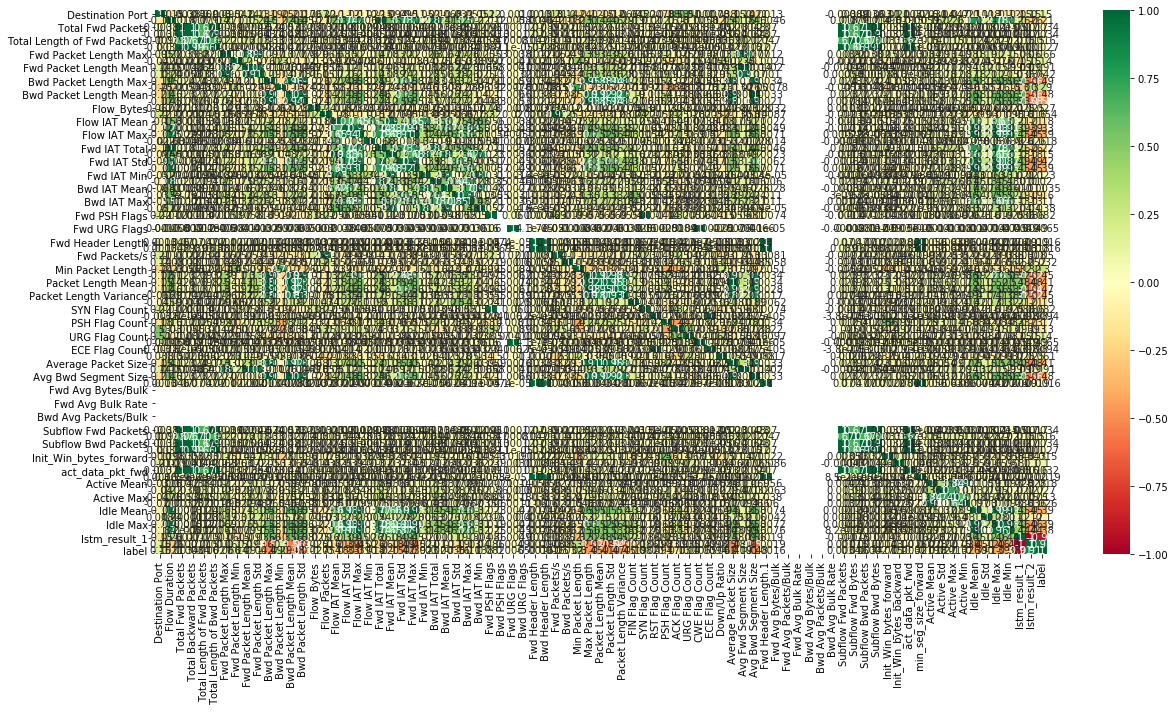

In [17]:
#Heatmap

fig = plt.figure(figsize=(20,10))
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

In [21]:
df_train.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow_Bytes', 'Flow_Packets',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN F

In [24]:
df_train = df_train[[' Destination Port','lstm_result_1','lstm_result_2',' Flow Duration','label']]
df_test = df_train[[' Destination Port','lstm_result_1','lstm_result_2',' Flow Duration','label']]

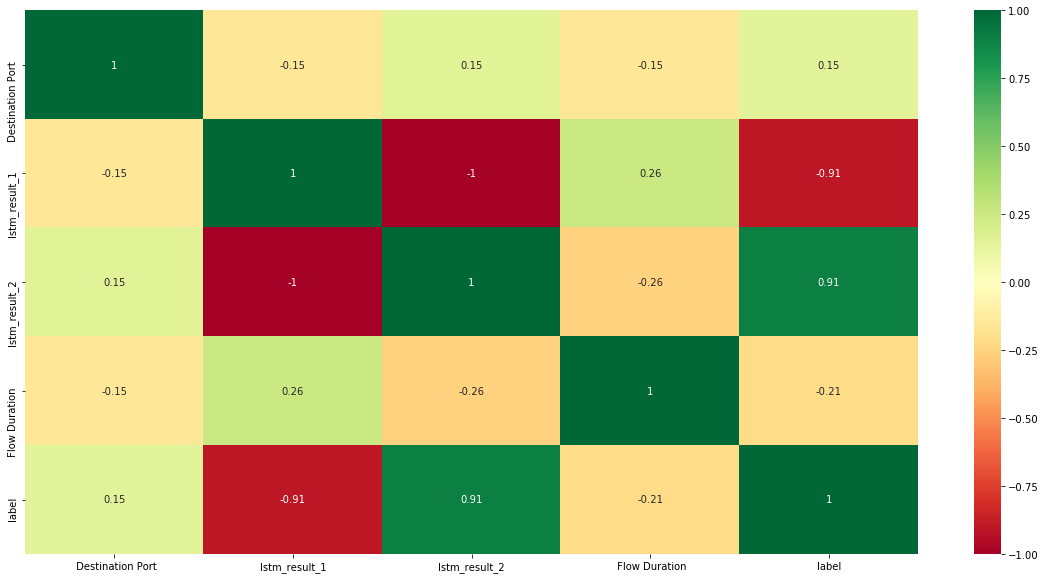

In [25]:
#Heatmap

fig = plt.figure(figsize=(20,10))
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

In [33]:
x_train = df_train[[' Destination Port','lstm_result_1','lstm_result_2',' Flow Duration']]
y_train = df_train['label']

x_test = df_test[[' Destination Port','lstm_result_1','lstm_result_2',' Flow Duration']]
y_test = df_test['label']

In [34]:
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [35]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

NB_Feature_Grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring='accuracy' ,verbose=1, cv=10, n_jobs=1)
NB_Feature_Grid.fit(x_train, y_train)
print(NB_Feature_Grid.best_estimator_)


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianNB(var_smoothing=0.03400411932703708)


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:  3.8min finished


In [36]:
print(NB_Feature_Grid.best_score_)

0.964857142857143


In [37]:
best_estimator = NB_Feature_Grid.best_estimator_
best_estimator

GaussianNB(var_smoothing=0.03400411932703708)

In [38]:
#Save Best Estimator 
joblib.dump(best_estimator, 'naive_bayes_cicids_final.pkl')

['naive_bayes_cicids_final.pkl']

In [39]:
best_nb = best_estimator
train_pred = best_nb.predict(x_train)
test_pred = best_nb.predict(x_test)

In [40]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.30,random_state=9)

In [41]:
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [42]:
train_pred = nb_classifier.predict(x_train)
val_pred = nb_classifier.predict(x_val)
test_pred = nb_classifier.predict(x_test)

In [43]:
def calculate_precision(TP, FP):
    return TP/(TP+FP)


def calculate_fnr(TP, FP, FN):
    return FN/(TP+FP)

In [44]:
cm = confusion_matrix(y_train, train_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_train, train_pred))
print("Accuracy:",accuracy_score(y_train, train_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[38330   912]
 [  829  8929]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      9758
           1       0.98      0.98      0.98     39242

    accuracy                           0.96     49000
   macro avg       0.94      0.95      0.94     49000
weighted avg       0.96      0.96      0.96     49000

Accuracy: 96.4469387755102
Precision 97.88298986184529
False Negative Rate 2.3289665211062593


In [45]:
cm = confusion_matrix(y_val, val_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_val, val_pred))
print("Accuracy:",accuracy_score(y_val, val_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[16445   363]
 [  369  3823]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4192
           1       0.98      0.98      0.98     16808

    accuracy                           0.97     21000
   macro avg       0.95      0.95      0.95     21000
weighted avg       0.97      0.97      0.97     21000

Accuracy: 96.51428571428572
Precision 97.80540026168669
False Negative Rate 2.1589151897228502


In [46]:
cm = confusion_matrix(y_test, test_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_test, test_pred))
print("Accuracy:",accuracy_score(y_test, test_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[54775  1275]
 [ 1198 12752]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     13950
           1       0.98      0.98      0.98     56050

    accuracy                           0.96     70000
   macro avg       0.94      0.95      0.94     70000
weighted avg       0.96      0.96      0.96     70000

Accuracy: 96.46714285714286
Precision 97.8596823468458
False Negative Rate 2.2778839797759636
